<a href="https://colab.research.google.com/github/eliasakalu/ICogLabs_AI_Projects/blob/main/Linear_Regression_with_Multiple_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧮 Linear Regression with Multiple Variable**
Dataset
We have 3 training examples with two features (Size and Bedrooms) and one target (Price):

| Size (sq ft) | Bedrooms | Price (y) |
|--------------|----------|-----------|
| 1000         | 2        | 200       |
| 1500         | 3        | 300       |
| 2000         | 4        | 400       |






In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([
    [1000, 2],
    [1500, 3],
    [2000, 4]
])
y=np.array([200,300,400])

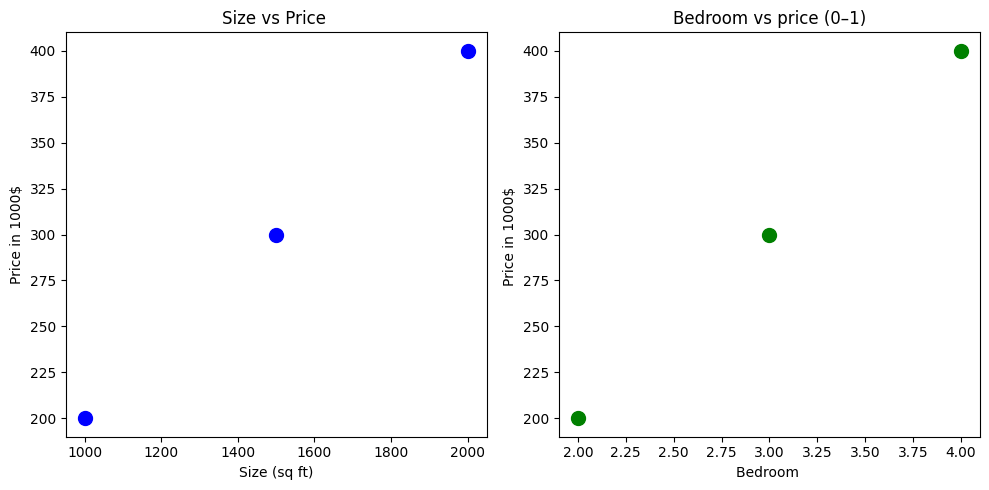

In [9]:
fig, plot = plt.subplots(1, 2, figsize=(10, 5))

plot[0].scatter(X[:,0], y ,color='blue', s=100)
plot[0].set_title("Size vs Price ")
plot[0].set_xlabel("Size (sq ft)")
plot[0].set_ylabel("Price in 1000$")

plot[1].scatter(X[:,1], y, color='green', s=100)
plot[1].set_title("Bedroom vs price (0–1)")
plot[1].set_xlabel("Bedroom ")
plot[1].set_ylabel("Price in 1000$ ")

plt.tight_layout()
plt.show()


In [15]:
def cost(X,y,W,b):
  m=X.shape[0]
  cost=0
  y_pred=X@W+b
  cost=np.sum((y_pred-y)**2)
  cost/=(2*m)
  return cost
def gradient_descent(X,y,W,b,a,iter):
  m=X.shape[0]
  for i in range(iter):
    dj_dw=(1/m)*X.T@(X@W+b-y)
    dj_db=(1/m)*np.sum(X@W+b-y)

    W=W-a*dj_dw
    b=b-a*dj_db
  return W,b

In [58]:
n=X.shape[1]
w = np.zeros(n)
b = 0.0
alpha = 1e-7
iterations = 10000
w_final,b_final=gradient_descent(X,y,w,b,alpha,iterations)
print(f"W={w_final} and b={b_final} with cost={cost(X,y,w_final,b_final):.6f}")


W=[0.19999912 0.0004    ] and b=0.00012412882930204575 with cost=0.000000


In [56]:
#That's to big cost so let us use feature scale
meanx=np.mean(X,axis=0)
stdx=np.std(X,axis=0)
X_norm=(X-meanx)/stdx

n=X.shape[1]
w = np.zeros(n)
b = 0.0
alpha = 1e-1
iterations = 1000
w_final,b_final=gradient_descent(X_norm,y,w,b,alpha,iterations)
print(f"W={w_final} and b={b_final} with cost={cost(X_norm,y,w_final,b_final):.6f}")

W=[40.82482905 40.82482905] and b=299.9999999999998 with cost=0.000000


# **Using Scikit Learn**

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
model=Pipeline([
    # ('scaler',StandardScaler()),
    ('regressor',LinearRegression())
])

model.fit(X,y)
W = model.named_steps['regressor'].coef_
b = model.named_steps['regressor'].intercept_


print(f"W={W}")
print(f"b={b}")
print(f"Cost:{cost(X,y,W,b):.6f}")

W=[0.1999992 0.0004   ]
b=-1.1368683772161603e-13
Cost:0.000000
